<a href="https://colab.research.google.com/github/sivaram-m-2003/Assignment/blob/main/Sivaram_M_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values in Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


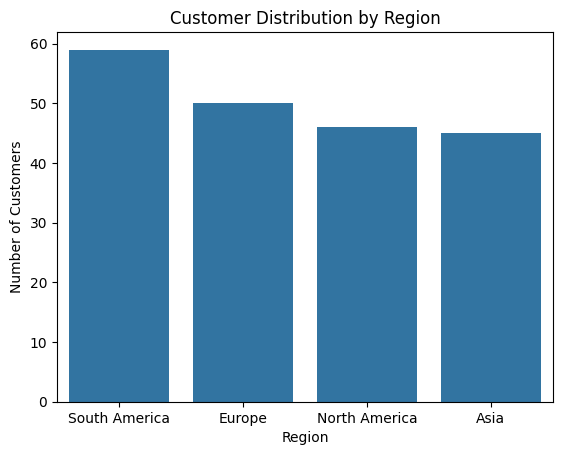

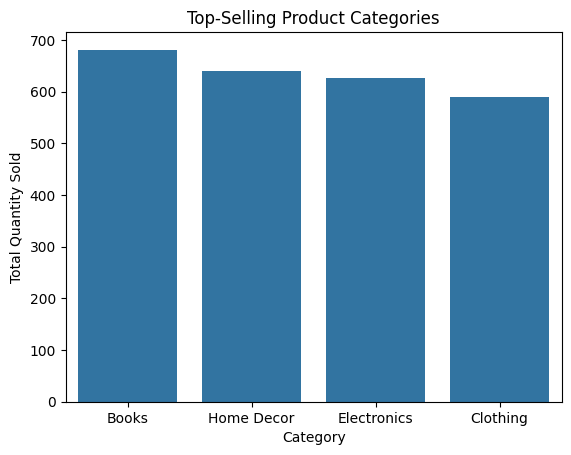

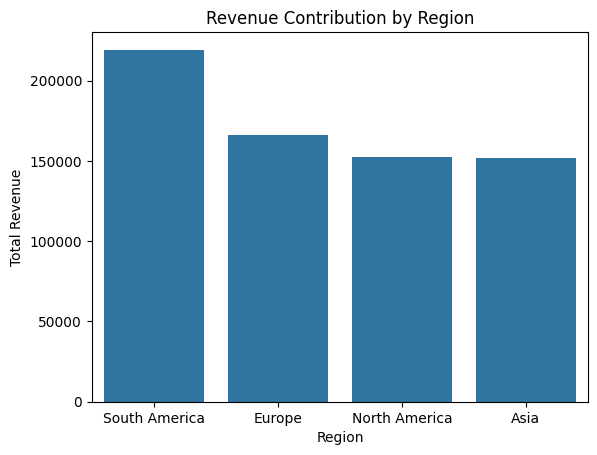

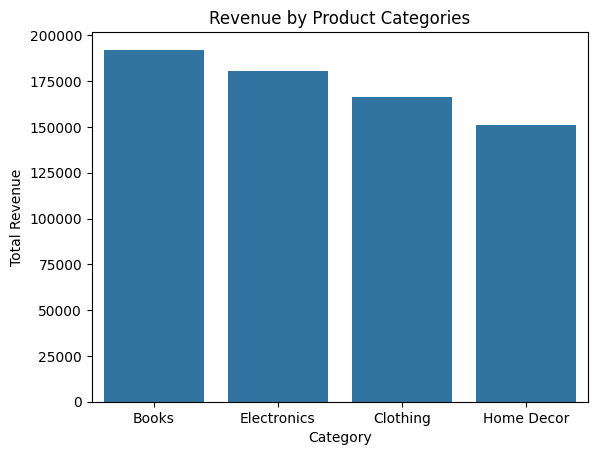

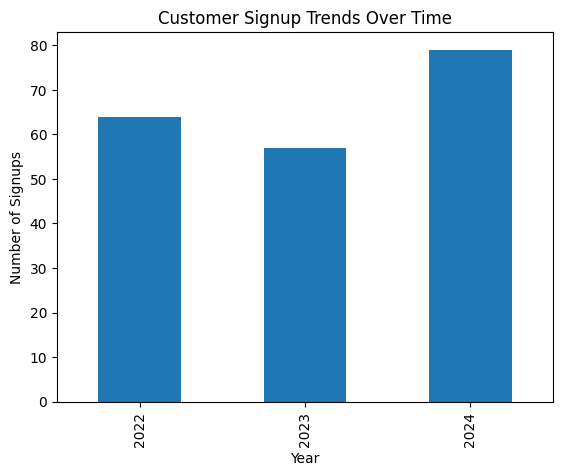

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("/content/drive/MyDrive/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Transactions.csv")

print("Missing values in Customers:", customers.isnull().sum())
print("Missing values in Products:", products.isnull().sum())
print("Missing values in Transactions:", transactions.isnull().sum())

merged = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

region_distribution = customers["Region"].value_counts()
sns.barplot(x=region_distribution.index, y=region_distribution.values)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

category_sales = merged.groupby("Category")["Quantity"].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Top-Selling Product Categories")
plt.xlabel("Category")
plt.ylabel("Total Quantity Sold")
plt.show()

region_revenue = merged.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
sns.barplot(x=region_revenue.index, y=region_revenue.values)
plt.title("Revenue Contribution by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()

category_revenue = merged.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title("Revenue by Product Categories")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.show()

customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
signup_trends = customers["SignupDate"].dt.year.value_counts().sort_index()
signup_trends.plot(kind="bar")
plt.title("Customer Signup Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()


In [ ]:
import pandas as pd

customers = pd.read_csv("/content/drive/MyDrive/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Transactions.csv")

merged = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

region_distribution = customers['Region'].value_counts(normalize=True) * 100
print("Customer Distribution by Region:")
print(region_distribution)

category_sales = merged.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
total_sales = category_sales.sum()
category_sales_percentage = (category_sales / total_sales) * 100
print("\nTop-Selling Product Categories:")
print(category_sales_percentage)

region_revenue = merged.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
total_revenue = region_revenue.sum()
region_revenue_percentage = (region_revenue / total_revenue) * 100
print("\nRevenue Contribution by Regions:")
print(region_revenue_percentage)

category_revenue = merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
total_category_revenue = category_revenue.sum()
category_revenue_percentage = (category_revenue / total_category_revenue) * 100
print("\nRevenue by Product Categories:")
print(category_revenue_percentage)

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
print("\nCustomer Signup Trends:")
print(signup_trends)


Customer Distribution by Region:
Region
South America    29.5
Europe           25.0
North America    23.0
Asia             22.5
Name: proportion, dtype: float64

Top-Selling Product Categories:
Category
Books          26.842728
Home Decor     25.187229
Electronics    24.714229
Clothing       23.255814
Name: Quantity, dtype: float64

Revenue Contribution by Regions:
Region
South America    31.790431
Europe           24.095029
North America    22.074548
Asia             22.039993
Name: TotalValue, dtype: float64

Revenue by Product Categories:
Category
Books          27.847639
Electronics    26.200676
Clothing       24.082859
Home Decor     21.868826
Name: TotalValue, dtype: float64

Customer Signup Trends:
SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64
